In [44]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn import metrics

FILES_DIR = os.path.abspath('tmp')

In [45]:
def gammaCorrection(imageName, gamma = 1.0, c = 1, epsilon = 1e-10):
	image = Image.open(f'{FILES_DIR}/noise/{imageName}')
	image = np.asarray(image)
	
	gammaImage = c * np.power((image.ravel() + epsilon) / 255, gamma) * 255
	gammaImage = np.clip(gammaImage, 0, 255).reshape(*image.shape)

	imageName = imageName.split('.')[0] + f'_{gamma}.' + imageName.split('.')[1]

	gammaImage = Image.fromarray(gammaImage.astype(np.uint8), mode = 'L')
	gammaImage.save(f'{FILES_DIR}/gammaCorrection/{imageName}')
	gammaImage.show()
	
def computeMetrics(imageA, imageB):
	imageA = np.asarray(imageA).astype(np.float32)
	imageB = np.asarray(imageB).astype(np.float32)

	medianAbsoluteError = metrics.mean_absolute_error(imageA.ravel(), imageB.ravel())
	meanSquaredError = metrics.mean_squared_error(imageA.ravel(), imageB.ravel())

	return medianAbsoluteError, meanSquaredError

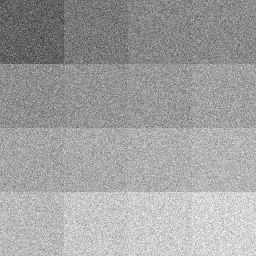

Gamma: 0.04


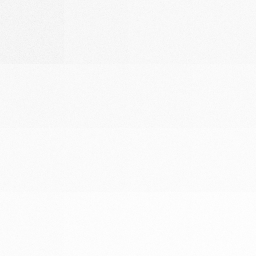

Erro Médio Absoluto: 88.29623413085938
Erro Médio Quadrático: 8780.2919921875 

Gamma: 0.4


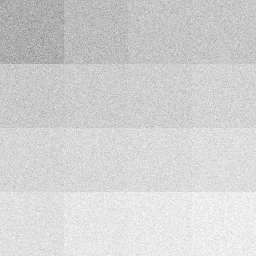

Erro Médio Absoluto: 49.30824279785156
Erro Médio Quadrático: 2670.29833984375 

Gamma: 2.5


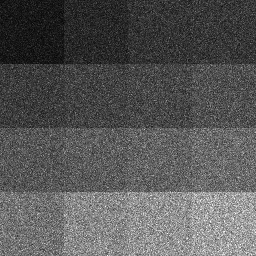

Erro Médio Absoluto: 74.08329772949219
Erro Médio Quadrático: 5625.595703125 

Gamma: 10


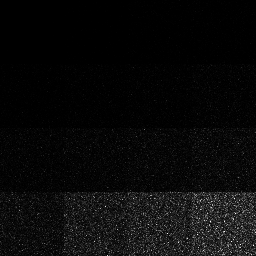

Erro Médio Absoluto: 151.62667846679688
Erro Médio Quadrático: 23579.498046875 



In [46]:
os.makedirs(f'{FILES_DIR}/noise/', exist_ok = True)
os.makedirs(f'{FILES_DIR}/gammaCorrection/', exist_ok = True)

imageName = 'imageE_gaussianNoise.bmp'
gammas = [0.04, 0.4, 2.5, 10]

image = Image.open(f'{FILES_DIR}/noise/{imageName}')
image.show()

for gamma in gammas:
    print(f'Gamma: {gamma}')
    gammaCorrection(imageName, gamma = gamma)

    imageGammaName = imageName.split('.')[0] + f'_{gamma}.' + imageName.split('.')[1]
    mae, mse = computeMetrics(Image.open(f'{FILES_DIR}/noise/{imageName}'), Image.open(f'{FILES_DIR}/gammaCorrection/{imageGammaName}'))

    print(f'Erro Médio Absoluto: {mae}')
    print(f'Erro Médio Quadrático: {mse}', '\n')